# CAS KAGGLE
### APC

Link al [Kaggle](https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied) del projecte

---
### CONTEXTE

En aquest kaggle tenim un dataset de tipus tabular.   
El conjunt de dades prové de la U.S. Small Business Administration (SBA)

L'SBA dels Estats Units es va fundar l'any 1953 amb el principi de promoure i ajudar les petites empreses al mercat de crèdit dels EUA. Les petites empreses han estat una font principal de creació d'ocupació als Estats Units; per tant, fomentar la formació i el creixement de petites empreses té beneficis socials en crear oportunitats laborals i reduir l'atur.

Hi ha hagut moltes històries d'èxit de noves empreses que reben garanties de préstecs de la SBA, com ara FedEx i Apple Computer. Tanmateix, també hi ha hagut històries de petites empreses i/o empreses emergents que no han complert amb el pagament  dels seus préstecs garantits per la SBA.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import math
from datetime import date

In [2]:
# Carreguem el dataset
dataset = pd.read_csv('../data/SBAnational.csv', header ='infer', low_memory=False)
print(dataset.shape)

(899164, 27)


In [3]:
dataset.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
dataset.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [5]:
print(dataset.describe())

       LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.991640e+05  899164.000000  899164.000000  899164.000000   
mean    4.772612e+09   53804.391241  398660.950146     110.773078   
std     2.538175e+09   31184.159152  263318.312759      78.857305   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.589758e+09   27587.000000  235210.000000      60.000000   
50%     4.361439e+09   55410.000000  445310.000000      84.000000   
75%     6.904627e+09   83704.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  899164.000000  899028.000000  899164.000000  899164.000000   
mean       11.411353       1.280404       8.430376      10.797257   
std        74.108196       0.451750     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.0000

### DESCRIPCIO DE DADES
Com es pot veure, tenim un dataset amb 899164 dades i 27 atributs, hi ha 10 atributs de tipus numèric, 5 de tipus categóric  
i la resta de tipus object, poden ser dates, strings, etc.  
El nostre atribut objectiu seria predir l'atribut **MIS_Status** el cual et diu si un prestec ha sigut aprovat o no.

|Nom|Descripció|Tipus|
|---|---|---|
LoanNr_ChkDgt|Identifier Primary key|int
Name|Borrower name|str
City|Borrower city|str
State|Borrower state|str
Zip|Borrower zip code|int
Bank|Bank name|str
BankState|Bank state|str
NAICS|North American industry classification system code|int
ApprovalDate|Date SBA commitment issued|data
ApprovalFY|Fiscal year of commitment|data
Term|Loan term in months|int
NoEmp|Number of business employees|int
NewExist|1 = Existing business, 2 = New business|category
CreateJob|Number of jobs created|int
RetainedJob|Number of jobs retained|int
FranchiseCode|Franchise code, (0 or 1) = No franchise|int
UrbanRural|1 = Urban, 2 = rural, 0 = undefined|category
RevLineCr|Revolving line of credit: Y = Yes, N = No|booleano
LowDoc|LowDoc Loan Program: Y = Yes, N = No|booleano
ChgOffDate|The date when a loan is declared to be in default|data
DisbursementDate|Disbursement date|data
DisbursementGross|Amount disbursed|int
BalanceGross|Gross amount outstanding|int
MIS_Status|Loan status 0 = CHGOFF, 1 = PIF|booleano
ChgOffPrinGr|Charged-off amount|int
GrAppv|Gross amount of loan approved by bank|int
SBA_Appv|SBA’s guaranteed amount of approved loan|int

In [6]:
#mirem els valors NAN
dataset.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [7]:
# les variablews identificatives les eliminem
dataset = dataset.drop(axis =1, columns = ['LoanNr_ChkDgt', 'Name', 'ChgOffDate', 'Zip'])

In [8]:
#Al tener mucha cantidad de datos los nans de City y State son insignificantes y los borramos
dataset = dataset.dropna(axis =0, subset=['City','State'])

In [9]:
# Ara tractem la variable objectiu
# prime eliminem els nans ja que no tenen sentit
dataset = dataset.dropna(axis =0, subset=['MIS_Status'])

# passem de tipus object a int (1 = si apriovat, 0 = no aprovat)
loan_status = {'P I F': 1,'CHGOFF': 0}
dataset.MIS_Status = [loan_status[item] for item in dataset.MIS_Status] 

In [10]:
print(Counter(dataset.MIS_Status).keys())
Counter(dataset.MIS_Status).values()

dict_keys([1, 0])


dict_values([739568, 157556])

In [11]:
# HI ha columnes on son de tipus float pero les tracta com a objects, fem el canvi
columnes_float = [17,18,20,21,22]
for i in columnes_float:
    dataset[dataset.columns[i]] = dataset[dataset.columns[i]].replace('[\$,]', '', regex=True).astype(float)

In [12]:
#La seguent es NewExist
#Mirem els possibles valors
Counter(dataset.NewExist).keys()
#Veiem valor 0 que no te sentit

dict_keys([2.0, 1.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [13]:
# per a tractar el valor 0 suposem que si es retenen llocs de treball es que existeix una empresa
cond = dataset[(dataset['NewExist'] == 0) & (dataset['RetainedJob'] >=1)].index
for i in cond:
    dataset.loc[i,['NewExist']] = 1

# igual pero amb els nulls
cond_2 = dataset[(dataset.NewExist.isnull()) & (dataset['RetainedJob'] >=1)].index
for i in cond_2:
    dataset.loc[i,['NewExist']] = 1

In [14]:
print(Counter(dataset.NewExist).keys()) # unique values
print(Counter(dataset.NewExist).values()) # count values

# Arribats aqui eliminem directament els nans i 0, primner passem de 0 a nans
cond_3 = dataset[(dataset['NewExist'] == 0)].index
for i in cond_3:
    dataset.loc[i,['NewExist']] = np.nan #11 corresponds to NewExist column
    
dataset = dataset.dropna(axis =0, subset=['NewExist'])

dict_keys([2.0, 1.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
dict_values([252544, 643687, 874, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [15]:
# Tambe trec el bank i el bankstate ja que son valors unics per lo tant no aporten informacio a la desicio
# les columnes DisbursementDate, DisbursementGross, BalanceGross,ChgOffPrinGr donen info de despres del prestec per tant,
# no son importants
dataset = dataset.drop(axis =1, columns = ['Bank', 'BankState', 'DisbursementDate', 'DisbursementGross', 
                                         'BalanceGross','ChgOffPrinGr'])

In [16]:
dataset.isnull().sum()

City                0
State               0
NAICS               0
ApprovalDate        0
ApprovalFY          0
Term                0
NoEmp               0
NewExist            0
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4517
LowDoc           2578
MIS_Status          0
GrAppv              0
SBA_Appv            0
dtype: int64

In [17]:
# ara passem les dates a date type
dataset['ApprovalDate'] = dataset['ApprovalDate'].astype(str)
dataset['ApprovalDate'] = pd.to_datetime(dataset['ApprovalDate'])

In [18]:
#per a tracta els nans de LowDoc no els eliminarem ja que son un atribuit important per a la prediccio
cond_4 = dataset[(dataset['LowDoc'] != "Y") & (dataset['LowDoc'] != "N")]
cond_4.shape

(5997, 17)

In [19]:
# mirem si existeix algun patro
low_doc = dataset[dataset['LowDoc'] == "Y"]
print("GrAppv: \n", low_doc['GrAppv'].describe())
print("\nTerm: \n", low_doc['Term'].describe())

GrAppv: 
 count     110044.000000
mean       68661.249228
std        37671.560574
min         4000.000000
25%        40000.000000
50%        60000.000000
75%       100000.000000
max      1000000.000000
Name: GrAppv, dtype: float64

Term: 
 count    110044.000000
mean         87.698312
std          45.809355
min           0.000000
25%          60.000000
50%          84.000000
75%          93.000000
max         511.000000
Name: Term, dtype: float64


In [20]:
print(Counter(low_doc.MIS_Status).keys())
print(Counter(low_doc.MIS_Status).values())

dict_keys([1, 0])
dict_values([100151, 9893])


In [21]:
cond_5 = cond_4[(cond_4['GrAppv'] <= 100000) & (cond_4['Term'] <= 93) & (cond_4['MIS_Status'] == 1)]
cond_5.shape
#hi ha 1565 columnes que es poden posar a 1

(1565, 17)

In [22]:
for i in cond_5.index:
    dataset.loc[i,['LowDoc']] = 'Y'

In [23]:
# repetim per al valors false
no_low_doc = dataset[dataset['LowDoc'] == "N"]
print("GrAppv: \n", no_low_doc['GrAppv'].describe())
print("\nTerm: \n", no_low_doc['Term'].describe())
print(Counter(no_low_doc.MIS_Status).keys())
print(Counter(no_low_doc.MIS_Status).values())

GrAppv: 
 count    7.801900e+05
mean     2.104921e+05
std      2.983505e+05
min      1.000000e+03
25%      3.500000e+04
50%      1.000000e+05
75%      2.550000e+05
max      5.472000e+06
Name: GrAppv, dtype: float64

Term: 
 count    780190.000000
mean        114.058374
std          81.945811
min           0.000000
25%          60.000000
50%          84.000000
75%         132.000000
max         569.000000
Name: Term, dtype: float64
dict_keys([1, 0])
dict_values([634164, 146026])


In [24]:
cond_6 = cond_4[(cond_4['GrAppv'] > 100000) & (cond_4['GrAppv'] <= 2.550000e+05) & (cond_4['Term'] > 93) & (cond_4['Term'] <= 132) & (cond_4['MIS_Status'] == 1)]
print(cond_6.shape)

for i in cond_6.index:
    dataset.loc[i,['LowDoc']] = 'N'

(198, 17)


In [25]:
cond_8 = dataset[(dataset['LowDoc'] != "Y") & (dataset['LowDoc'] != "N")]
cond_8.shape
# Aquestes si que les treiem
for i in cond_8.index:
    dataset.loc[i,'LowDoc'] = np.nan

datase4t = dataset.dropna(axis =0, subset=['LowDoc'])

In [26]:
# En el cas de RevLineCr no hi ha ningun patro per a tractar els nans aixi q leliminem
# tambe eliminem les dates de aprovament i la cantitat del gobern ja que es molt similar a la del SBA
dataset = dataset.drop(axis =1, columns = ['ApprovalDate', 'ApprovalFY','RevLineCr','GrAppv'])

In [27]:
# com del NAICS nomes son importants els dos primers nombres eliminem la resta
def dos_primers(d):
    if d <= 0:
        return 0
    return (d // 10 ** (int(math.log(d, 10)) - 1))

dataset['NAICS'] = dataset.NAICS.apply(dos_primers)

In [28]:
# Per a classificar en NAICS i el estat els hi apliquem un puntiatje en funció del seu valor original i el ratio
def point_def(rate):
    if rate <= 12:
        return 5
    elif  12 < rate <= 17: 
        return 4
    elif 17 < rate <= 21:
        return 3
    elif 21 < rate <= 25:
        return 2
    elif rate > 25:
        return 1
    
def apply_score(i):
    sector_default = {21:8, 11:9, 55:10, 62:10, 22:14, 92:15, 54:19, 42:19, 
                      31:19, 32:16, 33:14, 81:20, 71:21, 72:22, 44:22, 45:23, 
                      23:23, 56:24, 61:24, 51:25, 48:27, 49:23, 52:28, 53:29}
    if i > 0:
        defrate = None
        if i in sector_default:
            defrate = sector_default[i]
            return point_def(defrate)
    return 0

In [29]:
# apliquem el metode de puntuatge
dataset['Sector_Points'] = dataset.NAICS.apply(apply_score)

In [30]:
def apply_score_state(i):

    state_default = {'MT':8, 'ND': 8, 'WY':8, 'SD':8, 'VT':8, 'ME':10,'NH':10, 'NM':10, 'AK':10, 'WA':13,'AD':13, 'MN':13, 
                     'WI':13, 'IA':13,'NE':13, 'KS':13, 'MA':13,'CT':13,'RI':13,'PA':13, 'NV':23, 'IL':23, 'MI':23, 'KY':23,
                     'GA':23, 'FL':28}
    temp_defrate = None
    average_def_rate = 18
    if i in state_default:
        temp_defrate = state_default[i]
        return point_def(temp_defrate)
    return point_def(average_def_rate)

In [31]:
# apliquem el metode de puntuatge
dataset['State_Points'] = dataset.State.apply(apply_score_state)

In [32]:
# eliminem columnes irrellevants
dataset = dataset.drop(axis = 1, columns = ['City', 'State', 'NAICS'])

In [33]:
# cambiem de True/False a 1/0
def yes_no(i):
    if i > 0:
        return 1
    return 0

dataset.Term = dataset.Term//12
dataset['IscreateJob'] = dataset.CreateJob.apply(yes_no)
dataset['IsRetained'] = dataset.RetainedJob.apply(yes_no)
dataset['IsFranchise'] = dataset.FranchiseCode.apply(yes_no)

def lowdoc(i):
    if i == "Y":
        return 1
    return 0
dataset.LowDoc = dataset.LowDoc.apply(lowdoc)
dataset = dataset.drop(axis =1, columns = ['FranchiseCode', 'CreateJob', 'RetainedJob'])

In [34]:
# tornem a mirar els valors nan
dataset.isnull().sum()

Term             0
NoEmp            0
NewExist         0
UrbanRural       0
LowDoc           0
MIS_Status       0
SBA_Appv         0
Sector_Points    0
State_Points     0
IscreateJob      0
IsRetained       0
IsFranchise      0
dtype: int64

In [35]:
dataset.describe()

,Term,NoEmp,NewExist,UrbanRural,LowDoc,MIS_Status,SBA_Appv,Sector_Points,State_Points,IscreateJob,IsRetained,IsFranchise
count,896231.000000,896231.000000,896231.000000,896231.000000,896231.000000,896231.000000,8.962310e+05,896231.000000,896231.000000,896231.000000,896231.000000,896231.000000
mean,9.104249,11.402338,1.281784,0.757413,0.124532,0.824270,1.496817e+05,2.091423,3.128067,0.300669,0.510127,0.767973
std,6.636455,73.628689,0.449869,0.646445,0.330187,0.380591,2.284728e+05,1.448644,0.837907,0.458549,0.499898,0.422127
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000e+02,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.125000e+04,1.000000,3.000000,0.000000,0.000000,1.000000
50%,7.000000,4.000000,1.000000,1.000000,0.000000,1.000000,6.200000e+04,2.000000,3.000000,0.000000,1.000000,1.000000
75%,10.000000,10.000000,2.000000,1.000000,0.000000,1.000000,1.750000e+05,3.000000,4.000000,1.000000,1.000000,1.000000
max,47.000000,9999.000000,2.000000,2.000000,1.000000,1.000000,5.472000e+06,5.000000,5.000000,1.000000,1.000000,1.000000


### NATEJA DEL DATASET
Per a netejar el dataset, he tret tant les columnes identificatives com les que donaven informació irrellevant, en cuan al tractament de Nans he escollit diverses metodologies, en alguns casos he buscat una correlació amb altres atributs per a intentar predir el valor del nan (com el cas de l'atribut RevLineCr iLowDoc), en altres he fet suposicions a partir d'altres atributs que estaven relacionats (com el cas de NewExist) i en altres casos he eliminat les files directament.

E:\oriol\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


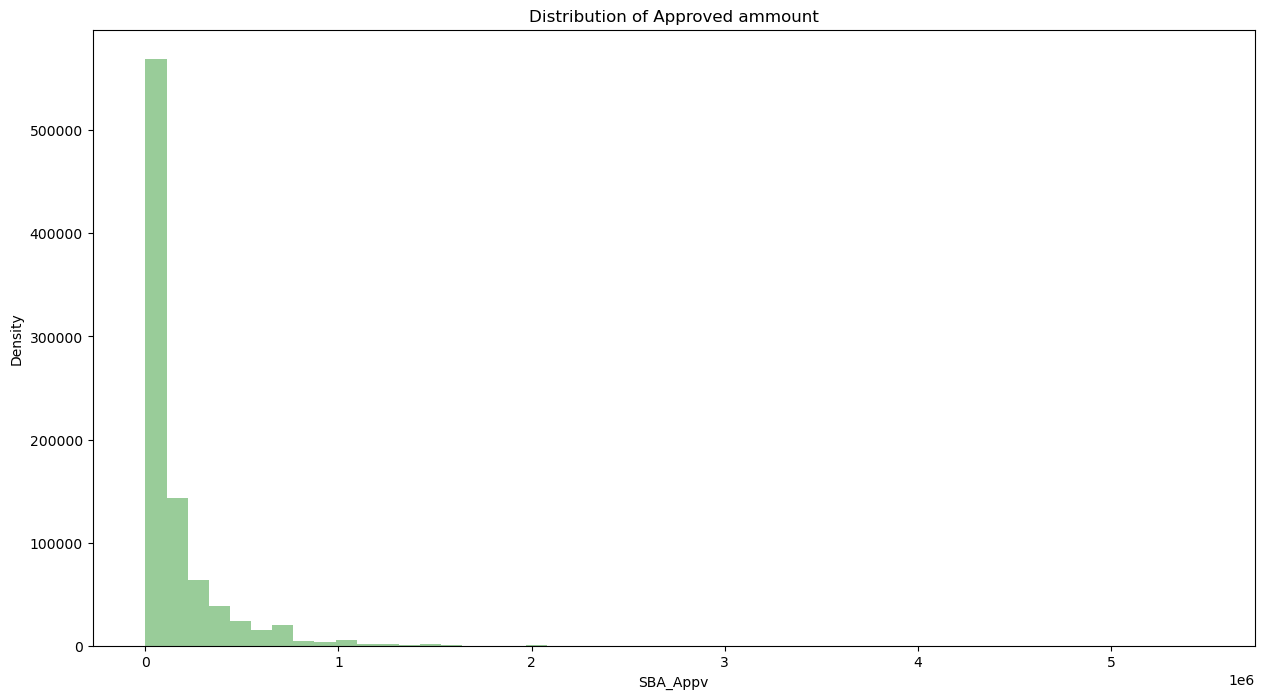

In [36]:
plt.figure(figsize=(15, 8))
sns.distplot(dataset['SBA_Appv'], color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [37]:
dataset['SBA_Appv'] = np.log(dataset['SBA_Appv']) 

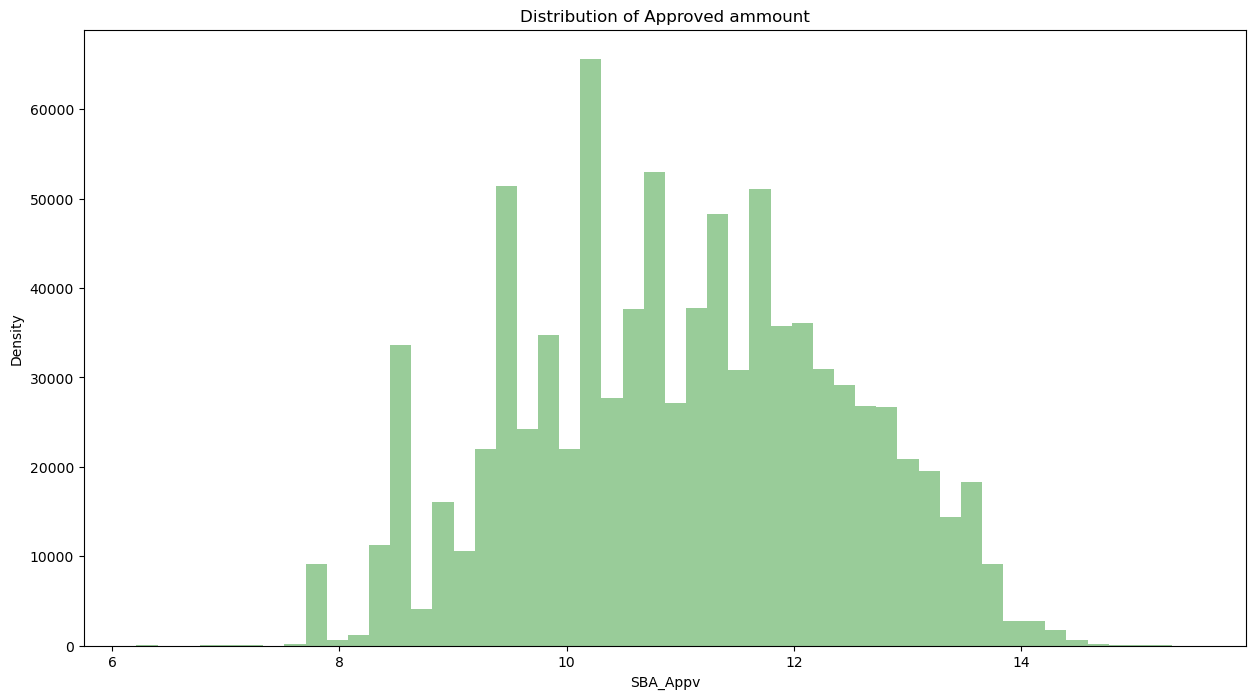

In [38]:
plt.figure(figsize=(15, 8))
sns.distplot(dataset['SBA_Appv'], color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

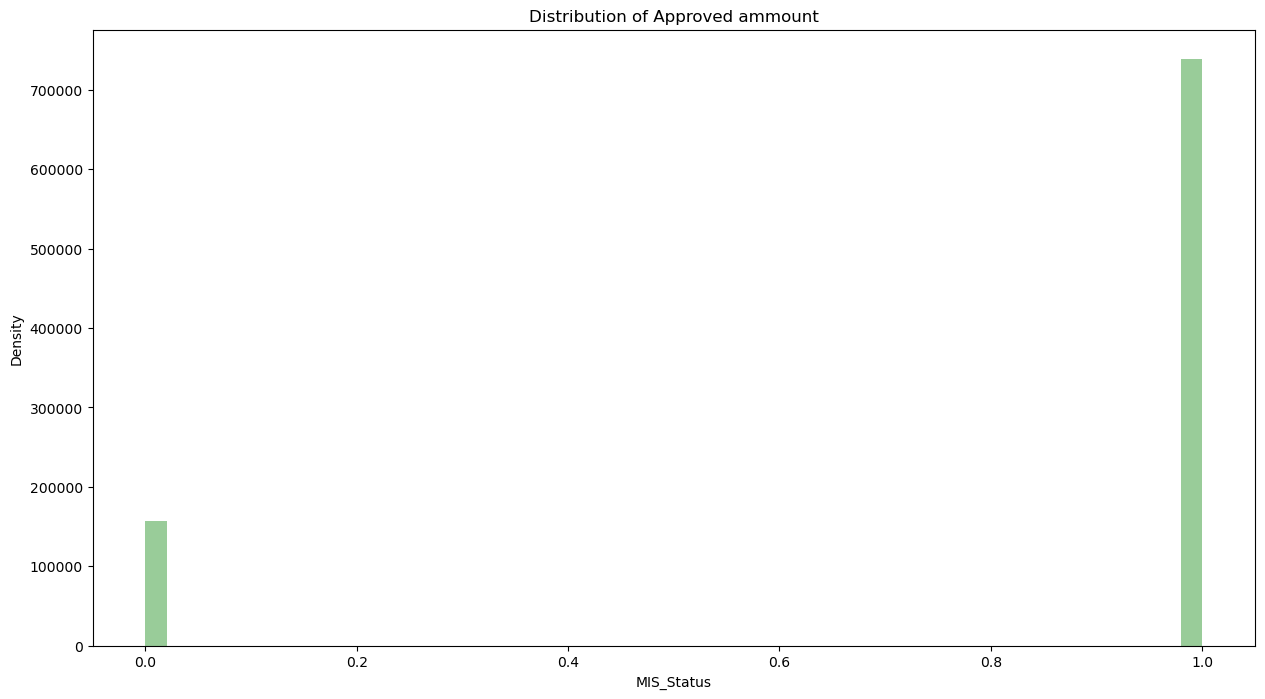

In [39]:
plt.figure(figsize=(15, 8))
sns.distplot(dataset['MIS_Status'], color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

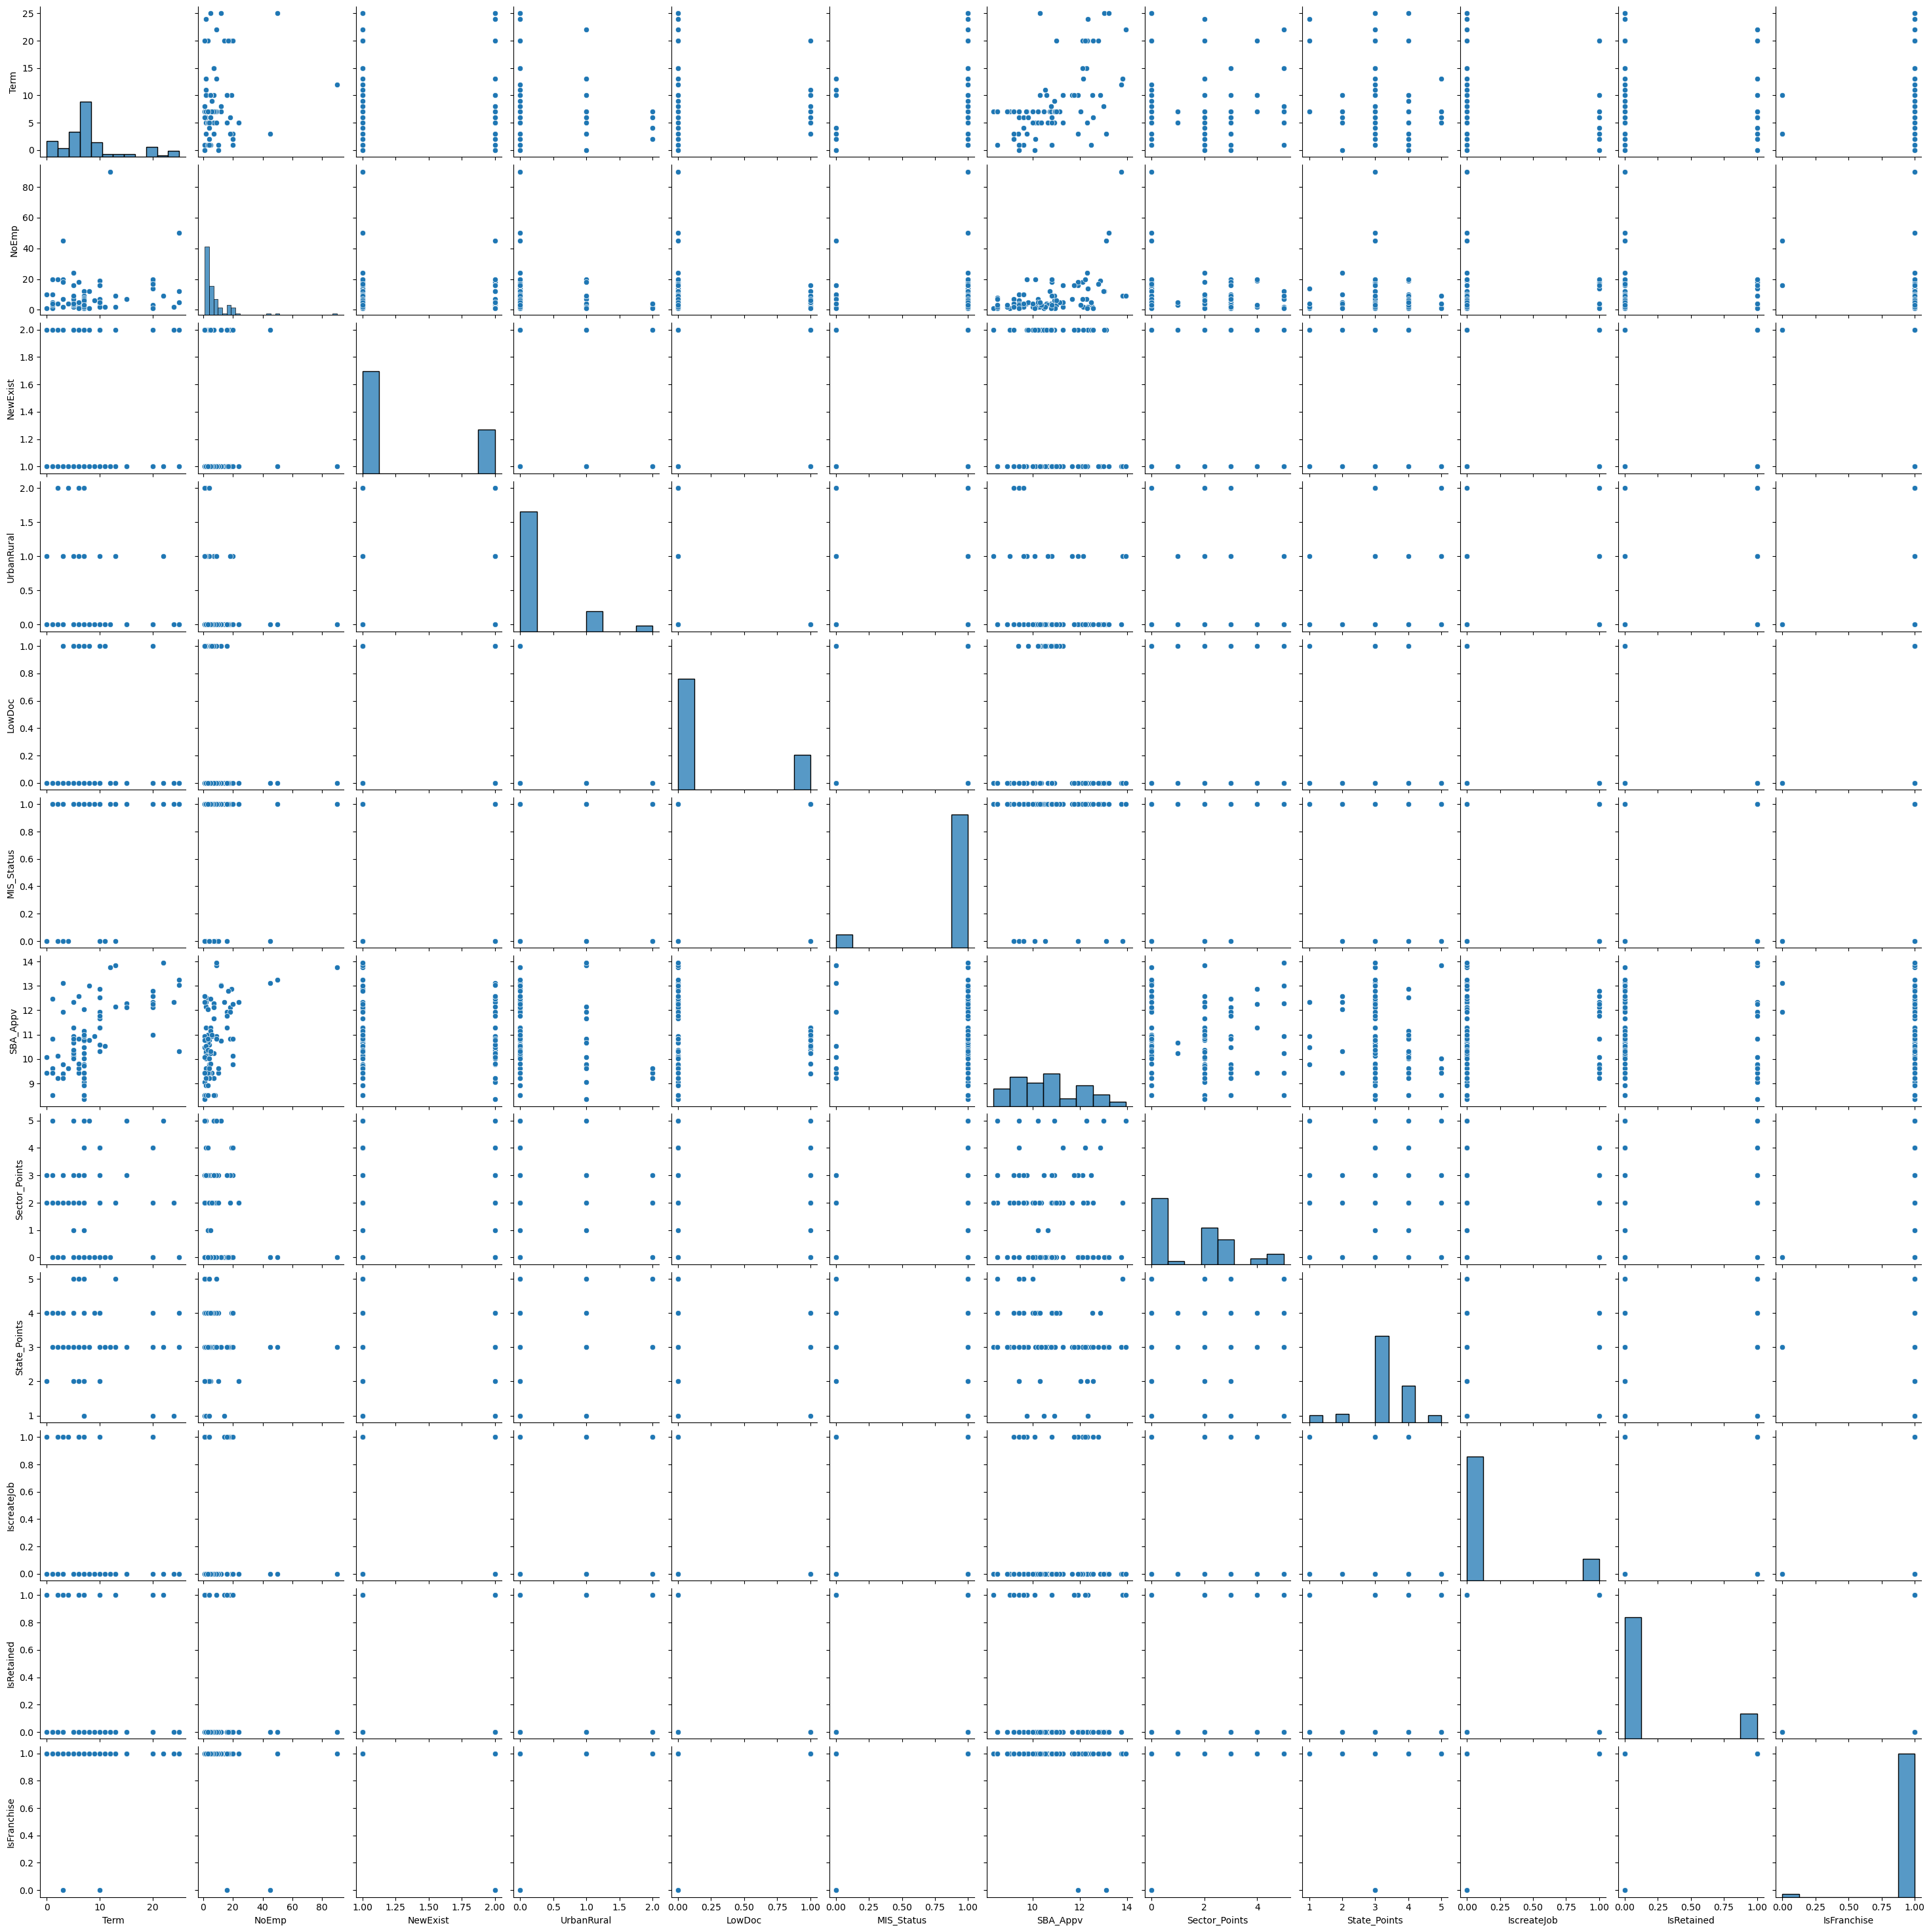

In [43]:
sns.pairplot(dataset[:100])

<Figure size 5800x100 with 0 Axes>

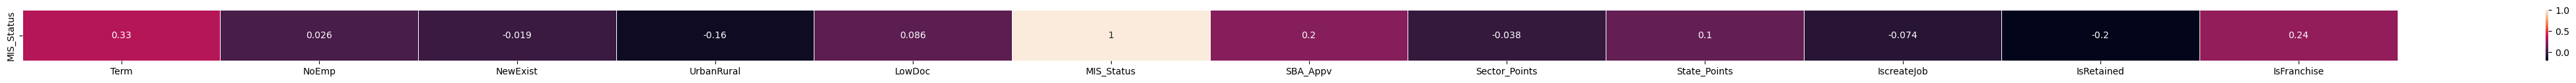

In [41]:
loan_correlation = dataset.corr()['MIS_Status'].to_frame().T 
plt.figure(figsize=(58,1))
plt.subplots(figsize=(58, 1))
sns.heatmap(loan_correlation, linewidths=0.5, annot=True)
plt.show()

### DATASET FINAL

En el dataset final he deixat els atributs més importants, en aquest cas son:

|Nom|Descripció|Tipus|Correlacio
|---|---|---|---|
Term|Loan term in months|int|0.33
NoEmp|Number of business employees|int|0.026
NewExist|1 = Existing business, 2 = New business|category|-0.019
UrbanRural|1 = Urban, 2 = rural, 0 = undefined|category|-0.16
LowDoc|LowDoc Loan Program: Y = Yes, N = No|booleano|0.086
MIS_Status|Loan status 0 = CHGOFF, 1 = PIF|booleano|1
SBA_Appv|SBA’s guaranteed amount of approved loan|int|0.2
Sector_Points|Punts en funcioó del sector empresarial|int|-0.038
State_Points|Punts en funció de l'estat|int|0.1
IsCreateJob|0 = No crea trabajos, 1 = Crea nuevos trabajos|int|-0.074
IsRetainedJob|0 = No retiene trabajos, 1 = Retiene trabajos|int|-0.2
IsFranchiseCode|0 = No franchise, 1 = Franchise|int|0.24

In [44]:
# Guardem el dataset netejat en un csv diferent
dataset.to_csv("../data/datasetFinal.csv")